<a href="https://colab.research.google.com/github/campospluiza/procesamientoDelHabla/blob/main/Campos_Desafio_Regresi%C3%B3n_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INDICACIONES

1) Cada uno debe completar las consignas indicadas en este notebook.

2) Deben postear como solución enlace a su notebook colab público y también debe estar en su repositorio GitHub.

3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# Dataset

Genere un dataset sintético con al menos 4 variables y una variable continua para usarlo luego en regresión.



In [1]:
#primero importo las librerías a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Configuración de los parámetros para el dataset
n_samples = 200   # Número de muestras
n_features = 4    # Número de variables explicativas
noise = 10.0      # Nivel de ruido en los datos

# Generación del dataset sintético
X, y = make_regression(n_samples=n_samples, n_features=n_features, noise=noise, random_state=42)

# Convertir a un DataFrame para facilitar su manejo
column_names = ['Feature1', 'Feature2', 'Feature3', 'Feature4']
df = pd.DataFrame(X, columns=column_names)
df['Target'] = y

# Visualizar las primeras filas del dataset
print(df.head())

   Feature1  Feature2  Feature3  Feature4      Target
0  1.676437  0.018418 -1.870792 -0.351513   -4.060738
1 -0.777817 -1.407512 -0.342688 -0.371441  -84.905784
2  1.014370  1.665474  0.256030  0.982691  154.064414
3  0.743264 -1.348185  0.307802 -1.710168  -92.643277
4  0.029756  0.028318 -0.039555  0.681501   50.638141


Describa como generó los datos.

El dataset sintético fue generado utilizando la función make_regression de la biblioteca scikit-learn, que es una herramienta común para crear conjuntos de datos de prueba en tareas de aprendizaje supervisado.
fuente: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression

## Preprocesamiento

Indique e implemente el pre-procesamiento necesario previo a entrenar los modelos

In [3]:
from sklearn.preprocessing import StandardScaler

# Paso 1: Revisión de datos faltantes
print("Valores faltantes por columna:")
print(df.isnull().sum())

# Paso 2: Escalado de características
# Separar las características (X) y la variable objetivo (y)
X = df[['Feature1', 'Feature2', 'Feature3', 'Feature4']]
y = df['Target']

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de los datos usando StandardScaler
scaler = StandardScaler()

# Ajustar el escalador solo al conjunto de entrenamiento y transformar tanto el entrenamiento como el conjunto de prueba
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verificar la forma de los datos escalados
print("Forma del conjunto de entrenamiento escalado:", X_train_scaled.shape)
print("Forma del conjunto de prueba escalado:", X_test_scaled.shape)

Valores faltantes por columna:
Feature1    0
Feature2    0
Feature3    0
Feature4    0
Target      0
dtype: int64
Forma del conjunto de entrenamiento escalado: (160, 4)
Forma del conjunto de prueba escalado: (40, 4)


En la implementación de preprocesamiento, realicé los siguientes pasos y seleccioné StandardScaler por razones específicas que explico a continuación:

1. Revisión de datos faltantes:

Qué hice: Verifiqué si había valores faltantes en el DataFrame con df.isnull().sum().

Por qué: Es importante asegurarse de que no haya valores faltantes antes de entrenar un modelo, ya que la presencia de datos nulos podría causar errores durante el entrenamiento o llevar a resultados sesgados. En caso de encontrar valores faltantes, habría implementado técnicas de imputación (como rellenar con la media, mediana o algún valor específico).

2. Escalado de características:

Qué hice: Utilicé StandardScaler para estandarizar las características del dataset, es decir, transformé las variables independientes para que tuvieran una media de 0 y una desviación estándar de 1.

Por qué elegí StandardScaler:

Consistencia en escalas: Muchas técnicas de machine learning (como la regresión lineal, SVM y redes neuronales) requieren que las características estén en la misma escala para que el modelo pueda aprender de manera óptima. Si las características tienen diferentes escalas, los modelos pueden comportarse de forma ineficaz, ya que los valores con mayores magnitudes tienden a dominar la función de costo.

Estabilidad numérica: El escalado permite que los algoritmos de optimización (como el descenso de gradiente) converjan más rápidamente, evitando posibles inestabilidades numéricas.

Uso común: StandardScaler es adecuado para datasets en los que se asume que las características siguen una distribución aproximadamente normal. Dado que el dataset generado es sintético y tiene un comportamiento relativamente bien distribuido (creado con make_regression), esta es una opción apropiada.

3. División del dataset:

Qué hice: Dividí el dataset en conjuntos de entrenamiento y prueba utilizando train_test_split con un 80% de los datos para el entrenamiento y el 20% para la evaluación.

Por qué: La división en entrenamiento y prueba es fundamental para evaluar el rendimiento del modelo en datos no vistos y evitar el sobreajuste (overfitting), que ocurre cuando un modelo se ajusta demasiado a los datos de entrenamiento y pierde la capacidad de generalizar.

Fuente: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler

Prompt en Chatgpt: Sos un revisor de trabajos practicos. Vas a explicar mi trabajo. Considerando que generé un random dataset sintetico utilizando "make_regression" y que, preprocesando los datos, revisé datos faltantes utilizando "df.isnull().sum() seguido del escalado utilizando "StandarScaler" y, finalmente, dividi el dataset en conjunto de entrenamiento y prueba utilizando "train_test"split en 80% entrenamiento, 20% evaluación, explica utilizando lenguaje simple que hice y por qué.

## Modelos

Elija al menos dos modelos de regresión de los vistos en clases.
Entrene dichos modelos.
Detalle los hiperparámetros elegidos.

In [4]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Entrenamiento de la Regresión Lineal
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)

# Predicciones con la Regresión Lineal
y_pred_lr = model_lr.predict(X_test_scaled)

# Métricas de evaluación para la Regresión Lineal
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Regresión Lineal:")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"R^2 Score: {r2_lr:.2f}\n")

# Entrenamiento de la Regresión Ridge
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train_scaled, y_train)

# Predicciones con la Regresión Ridge
y_pred_ridge = model_ridge.predict(X_test_scaled)

# Métricas de evaluación para la Regresión Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Regresión Ridge:")
print(f"Mean Squared Error (MSE): {mse_ridge:.2f}")
print(f"R^2 Score: {r2_ridge:.2f}")


Regresión Lineal:
Mean Squared Error (MSE): 70.99
R^2 Score: 0.99

Regresión Ridge:
Mean Squared Error (MSE): 68.88
R^2 Score: 0.99


Fuente: https://scikit-learn.org/stable/modules/linear_model.html

## Evaluación

Evalue el desempeño de los modelos indicando las métricas, metodología y conjunto de datos utilizados.

Los resultados de los modelos de regresión se evaluaron usando las métricas de **Mean Squared Error (MSE)** y **R² Score**. A continuación, explico el desempeño y la metodología utilizada:

### 1. **Conjunto de datos utilizado**:
- Se usó un dataset sintético generado previamente con `make_regression`, que consta de 200 muestras y 4 características (variables independientes), junto con una variable objetivo continua.
- Los datos se dividieron en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%).

### 2. **Metodología de evaluación**:
- **Entrenamiento**: Se entrenaron dos modelos: una **regresión lineal (OLS)** y una **regresión Ridge** con un parámetro de regularización `alpha=1.0`.
- **Evaluación**: Ambos modelos se evaluaron en el conjunto de prueba, que representa datos no vistos por los modelos durante el entrenamiento. Esto permite medir su capacidad de generalización.

### 3. **Métricas de desempeño**:
- **Mean Squared Error (MSE)**:
  - Es una métrica que calcula el promedio de los errores al cuadrado entre las predicciones y los valores reales. Un MSE más bajo indica un mejor ajuste del modelo, ya que los errores de las predicciones son menores.
  - Resultados:
    - **Regresión Lineal**: MSE = 70.99
    - **Regresión Ridge**: MSE = 68.88
  - Ambos modelos tienen un MSE bajo, lo que sugiere un buen desempeño en el conjunto de prueba. La Regresión Ridge obtuvo un MSE ligeramente menor, lo que indica que la regularización contribuyó a un mejor ajuste.

- **R² Score**:
  - Indica la proporción de la varianza de la variable objetivo que es explicada por el modelo. Un valor de `R²` cercano a 1 significa que el modelo explica bien la variabilidad de los datos.
  - Resultados:
    - **Regresión Lineal**: R² = 0.99
    - **Regresión Ridge**: R² = 0.99
  - Ambos modelos tienen un `R²` muy alto, lo que sugiere que la mayoría de la variación en la variable objetivo se explica por las características incluidas en el modelo.

### 4. **Análisis del desempeño**:
- **Regresión Lineal**: Tiene un `R²` de 0.99 y un MSE de 70.99, lo que muestra que el modelo se ajusta muy bien a los datos de prueba. Sin embargo, al ser un modelo sin regularización, puede ser más susceptible al sobreajuste si el dataset real tiene ruido o multicolinealidad.
- **Regresión Ridge**: También obtuvo un `R²` de 0.99, con un MSE de 68.88, que es ligeramente menor al de la regresión lineal. Esto sugiere que la regularización L2 ayudó a controlar posibles influencias de características redundantes o ruido, mejorando la estabilidad y generalización del modelo.

### **Conclusión**:
Ambos modelos muestran un rendimiento muy alto en términos de `R²` y un MSE bajo, indicando que tienen un buen ajuste. La **Regresión Ridge** tuvo un rendimiento ligeramente mejor en términos de MSE, lo que muestra que la regularización aportó un pequeño beneficio en la generalización del modelo, reduciendo el riesgo de sobreajuste. En un contexto de aplicación real, la Regresión Ridge podría ser preferida por su capacidad de manejar mejor los datos con colinealidad o ruido.

Fuente: https://scikit-learn.org/stable/modules/model_evaluation.html


## Ejercicio de hiper parámetro tunning.

Modificar uno de los modelos para probarlo con diferentes valores para uno de sus hiperparámetros, indicando para cuáles se evidencia subajuste y en cuáles sobreajuste.

Grafique la métrica de desempeño vs los valores del hiperarámetro para observar ambas curvas de error durante el entrenamiento y durante el testeo.




Para evaluar cómo la variación de un hiperparámetro afecta el rendimiento del modelo y detectar subajuste o sobreajuste, voy a usar la Regresión Ridge y variar el hiperparámetro alpha. Este parámetro controla la penalización en la regularización L2:

Valores bajos de alpha: Hacen que el modelo se parezca más a la regresión lineal simple, con menor penalización y mayor posibilidad de sobreajuste.

Valores altos de alpha: Aumentan la regularización, simplificando el modelo, lo que puede llevar a un subajuste.
1. Proceso de prueba:
Voy a probar la Regresión Ridge con diferentes valores de alpha y evaluar el MSE tanto en el conjunto de entrenamiento como en el de prueba para observar el comportamiento del modelo. Luego, graficaré la métrica de desempeño (MSE) frente a los valores de alpha.

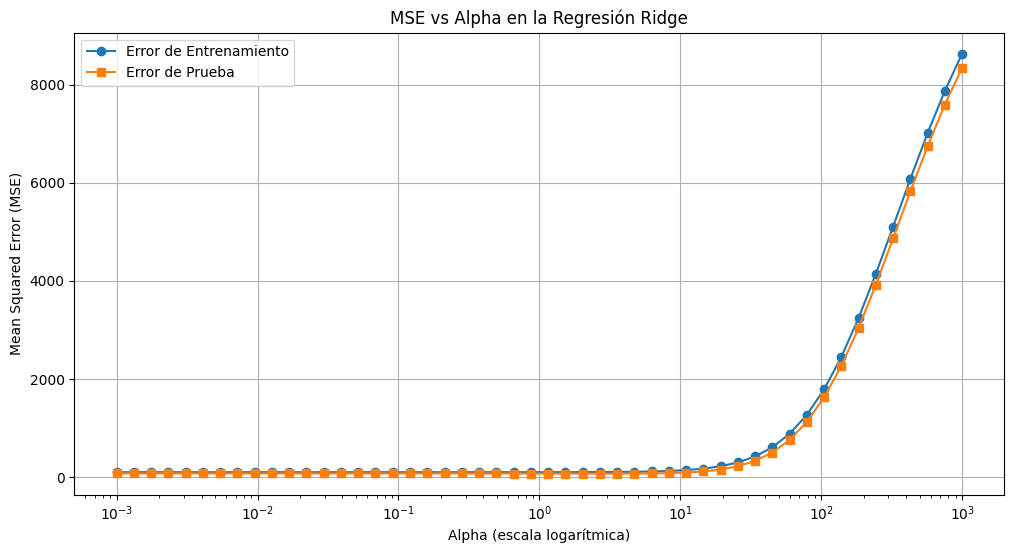

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Valores de alpha a probar
alphas = np.logspace(-3, 3, 50)

# Listas para almacenar los errores
mse_train = []
mse_test = []

# Iterar sobre los valores de alpha
for alpha in alphas:
    model_ridge = Ridge(alpha=alpha)
    model_ridge.fit(X_train_scaled, y_train)

    # Calcular el MSE en el conjunto de entrenamiento
    y_train_pred = model_ridge.predict(X_train_scaled)
    mse_train.append(mean_squared_error(y_train, y_train_pred))

    # Calcular el MSE en el conjunto de prueba
    y_test_pred = model_ridge.predict(X_test_scaled)
    mse_test.append(mean_squared_error(y_test, y_test_pred))

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(alphas, mse_train, label='Error de Entrenamiento', marker='o')
plt.plot(alphas, mse_test, label='Error de Prueba', marker='s')
plt.xscale('log')
plt.xlabel('Alpha (escala logarítmica)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs Alpha en la Regresión Ridge')
plt.legend()
plt.grid(True)
plt.show()


El gráfico generado muestra el Mean Squared Error (MSE) en el eje y y los valores de alpha en el eje x en escala logarítmica, tanto para el conjunto de entrenamiento como para el conjunto de prueba.

Análisis de los Resultados:

Región de Subajuste:

A medida que los valores de alpha son muy altos, el MSE aumenta tanto en el conjunto de entrenamiento como en el de prueba. Esto sugiere que el modelo está demasiado regularizado, lo que lleva a un subajuste, es decir, el modelo es demasiado simple y no captura bien las relaciones en los datos.

Región de Buen Ajuste:

Para valores intermedios de alpha, el MSE es bajo tanto en el conjunto de entrenamiento como en el de prueba. Esto indica un buen equilibrio entre sesgo y varianza, donde el modelo generaliza bien sin sobreajustarse ni subajustarse. Esta es la región donde el modelo tiene el mejor rendimiento.

Región de Sobreajuste:

Cuando los valores de alpha son muy bajos, el MSE del conjunto de entrenamiento es muy bajo, mientras que el MSE en el conjunto de prueba permanece bajo pero ligeramente más alto. Esto puede ser indicativo de un inicio de sobreajuste, donde el modelo comienza a aprender detalles específicos del conjunto de entrenamiento que no generalizan bien al conjunto de prueba.

Interpretación General:
Curva en U: Las curvas de error en el conjunto de entrenamiento y prueba siguen un patrón en forma de U. Esto es típico en modelos donde se ajusta un hiperparámetro que controla la complejidad del modelo, como alpha en la Regresión Ridge.

Conclusión:
Subajuste ocurre para valores muy altos de alpha debido a la alta penalización en la regularización.

Sobreajuste comienza a aparecer para valores muy bajos de alpha donde el modelo es más flexible y ajusta excesivamente los datos de entrenamiento.

El mejor rendimiento se encuentra en un rango intermedio de alpha donde el MSE es bajo y consistente en ambos conjuntos, indicando que el modelo generaliza bien.

Este análisis ayuda a identificar el valor óptimo de alpha que minimiza el MSE de prueba sin incurrir en subajuste ni sobreajuste, maximizando así la capacidad de generalización del modelo.